In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('stroke_data.csv')

In [3]:
df = df.rename(columns={'Residence_type':'residence_type'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29062 non-null  object 
 1   age                29031 non-null  float64
 2   hypertension       29063 non-null  float64
 3   heart_disease      29057 non-null  float64
 4   ever_married       29053 non-null  object 
 5   work_type          29051 non-null  object 
 6   residence_type     29053 non-null  object 
 7   avg_glucose_level  29021 non-null  float64
 8   bmi                29040 non-null  float64
 9   smoking_status     29048 non-null  object 
 10  stroke             29063 non-null  float64
dtypes: float64(6), object(5)
memory usage: 2.4+ MB


In [4]:
def show_all_variable_values(df):
    variable_values = {}
    for column_name in df.columns:
        unique_values = df[column_name].unique()
        variable_values[column_name] = unique_values
    return variable_values

all_variable_values = show_all_variable_values(df)
for column_name, unique_values in all_variable_values.items():
    print(f"Values of variable '{column_name}':")
    print(unique_values)
    print()

Values of variable 'gender':
['Male' 'Female' nan]

Values of variable 'age':
[58. 70. 52. 75. 32. 74. 79. 37. nan 40. 35. 20. 42. 44. 57. 49. 71. 59.
 25. 67. 38. 54. 23. 45. 66. 69. 78. 27. 43. 30. 46. 61. 48. 29. 76. 21.
 18. 33. 82. 24. 64. 68. 55. 47. 60. 36. 39. 72. 41. 53. 56. 80. 34. 26.
 17. 31. 13. 22. 12. 62. 65. 81. 14. 51. 28. 16. 77. 63. 15. 73. 50. 19.
 11. 10.]

Values of variable 'hypertension':
[ 1.  0. nan]

Values of variable 'heart_disease':
[ 0.  1. nan]

Values of variable 'ever_married':
['Yes' 'No' nan]

Values of variable 'work_type':
['Private' 'Self-employed' 'Govt_job' nan 'children' 'Never_worked']

Values of variable 'residence_type':
['Urban' 'Rural' nan]

Values of variable 'avg_glucose_level':
[ 87.96  69.04  77.59 ... 121.45 132.22 213.61]

Values of variable 'bmi':
[39.2 35.9 17.7 27.  32.3 54.6 22.  39.4 26.1  nan 33.  19.7 22.5 24.6
 25.2 60.9 31.5 27.3 23.7 28.4 26.9 26.7 31.2 27.5 25.1 30.9 29.4 36.
 28.5 26.8 33.6 34.9 35.3 26.4 36.7 29.3 36.6 2

In [5]:
#Find irrelevent data
def find_irrelevant_data(df):
    filtered_data = pd.DataFrame()
    
    for column_name in df.columns:
        if column_name == 'age':
            # Check for age values outside a reasonable range
            filtered_column = df[(df[column_name] < 0) | (df[column_name] > 150)]
            
        elif column_name == 'gender':
            # Check for gender values that are not in the expected categories
            expected_categories = ['Male', 'Female', np.nan]
            filtered_column = df[~df[column_name].isin(expected_categories)]
            
        elif column_name in ['hypertension', 'heart_disease', 'stroke']:
            # Check for values that are not in the expected categories [1, 0, np.nan]
            expected_categories = [1, 0, np.nan]
            filtered_column = df[~df[column_name].isin(expected_categories)]

        elif column_name == 'ever_married':
            # Check for gender values that are not in the expected categories
            expected_categories = ['Yes', 'No', np.nan]
            filtered_column = df[~df[column_name].isin(expected_categories)]
            
        elif column_name == 'work_type':
            # Check for gender values that are not in the expected categories
            expected_categories = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked', np.nan]
            filtered_column = df[~df[column_name].isin(expected_categories)]
        
        elif column_name == 'residence_type':
            # Check for gender values that are not in the expected categories
            expected_categories = ['Rural', 'Urban', np.nan]
            filtered_column = df[~df[column_name].isin(expected_categories)]
            
        elif column_name == 'avg_glucose_level':
            # Check for age values outside a reasonable range
            filtered_column = df[(df[column_name] < 10) | (df[column_name] > 400)]

        elif column_name == 'bmi':
            # Check for age values outside a reasonable range
            filtered_column = df[(df[column_name] < 10) | (df[column_name] > 95)]
            
        else:
            # Add any other conditions for specific columns as needed
            filtered_column = pd.DataFrame()
        
        # Append the filtered column to the overall filtered dataset
        filtered_data = pd.concat([filtered_data, filtered_column])
    
    return filtered_data

irrelevant_data = find_irrelevant_data(df)
print(irrelevant_data)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [6]:
#Find duplicates
def find_duplicates(df):
    duplicate_rows = df[df.duplicated()]
    return duplicate_rows

duplicate_rows = find_duplicates(df)
print(duplicate_rows)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [7]:
#Calculate missing values
def count_missing_values(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
    return missing_data

missing_data = count_missing_values(df)
missing_data

,Missing Values,Percentage
gender,3,0.010322
age,34,0.116979
hypertension,2,0.006881
heart_disease,8,0.027525
ever_married,12,0.041287
work_type,14,0.048168
residence_type,12,0.041287
avg_glucose_level,44,0.151385
bmi,25,0.086014
smoking_status,17,0.058490


In [8]:
#Drop missing values from the dataset
df = df.dropna()

In [9]:
from scipy.stats import skew, kurtosis

def calculate_statistics(df, column):
    column_values = df[column]
    
    # Number of values
    count = column_values.count()

    # Mean
    mean = column_values.mean()

    # Mode
    mode = column_values.mode().values

    # Median
    median = column_values.median()

    # Skewness
    skewness = skew(column_values)

    # Standard error of skewness
    se_skewness = skewness / (count ** 0.5)

    # Kurtosis
    kurt = kurtosis(column_values)

    # Standard error of kurtosis
    se_kurtosis = (kurt - 3) / (count ** 0.5)

    return count, mean, mode, median, skewness, se_skewness, kurt, se_kurtosis

count_age, mean_age, mode_age, median_age, skewness_age, se_skewness_age, kurt_age, se_kurtosis_age = calculate_statistics(df, 'age')
count_glucose, mean_glucose, mode_glucose, median_glucose, skewness_glucose, se_skewness_glucose, kurt_glucose, se_kurtosis_glucose = calculate_statistics(df, 'avg_glucose_level')
count_bmi, mean_bmi, mode_bmi, median_bmi, skewness_bmi, se_skewness_bmi, kurt_bmi, se_kurtosis_bmi = calculate_statistics(df, 'bmi')

print("Number of values (age):", count_age)
print("Mean (age):", mean_age)
print("Mode (age):", mode_age)
print("Median (age):", median_age)
print("Skewness (age):", skewness_age)
print("Standard Error of Skewness (age):", se_skewness_age)
print("Kurtosis (age):", kurt_age)
print("Standard Error of Kurtosis (age):", se_kurtosis_age)

print("Number of values (avg_glucose_level):", count_glucose)
print("Mean (avg_glucose_level):", mean_glucose)
print("Mode (avg_glucose_level):", mode_glucose)
print("Median (avg_glucose_level):", median_glucose)
print("Skewness (avg_glucose_level):", skewness_glucose)
print("Standard Error of Skewness (avg_glucose_level):", se_skewness_glucose)
print("Kurtosis (avg_glucose_level):", kurt_glucose)
print("Standard Error of Kurtosis (avg_glucose_level):", se_kurtosis_glucose)

print("Number of values (bmi):", count_bmi)
print("Mean (bmi):", mean_bmi)
print("Mode (bmi):", mode_bmi)
print("Median (bmi):", median_bmi)
print("Skewness (bmi):", skewness_bmi)
print("Standard Error of Skewness (bmi):", se_skewness_bmi)
print("Kurtosis (bmi):", kurt_bmi)
print("Standard Error of Kurtosis (bmi):", se_kurtosis_bmi)

Number of values (age): 28916
Mean (age): 47.668280536727075
Mode (age): [51.]
Median (age): 48.0
Skewness (age): -0.002761209475527582
Standard Error of Skewness (age): -1.623791437714166e-05
Kurtosis (age): -0.967930122995591
Standard Error of Kurtosis (age): -0.023334306999425618
Number of values (avg_glucose_level): 28916
Mean (avg_glucose_level): 106.38826462857934
Mode (avg_glucose_level): [87.15]
Median (avg_glucose_level): 92.12
Skewness (avg_glucose_level): 1.5706599370431187
Standard Error of Skewness (avg_glucose_level): 0.009236619604327484
Kurtosis (avg_glucose_level): 1.6539995414492443
Standard Error of Kurtosis (avg_glucose_level): -0.00791545892886831
Number of values (bmi): 28916
Mean (bmi): 30.04965762899433
Mode (bmi): [26.8 27.6]
Median (bmi): 28.9
Skewness (bmi): 1.0722049140824848
Standard Error of Skewness (bmi): 0.006305342547868569
Kurtosis (bmi): 2.2287520104611716
Standard Error of Kurtosis (bmi): -0.00453549755231131


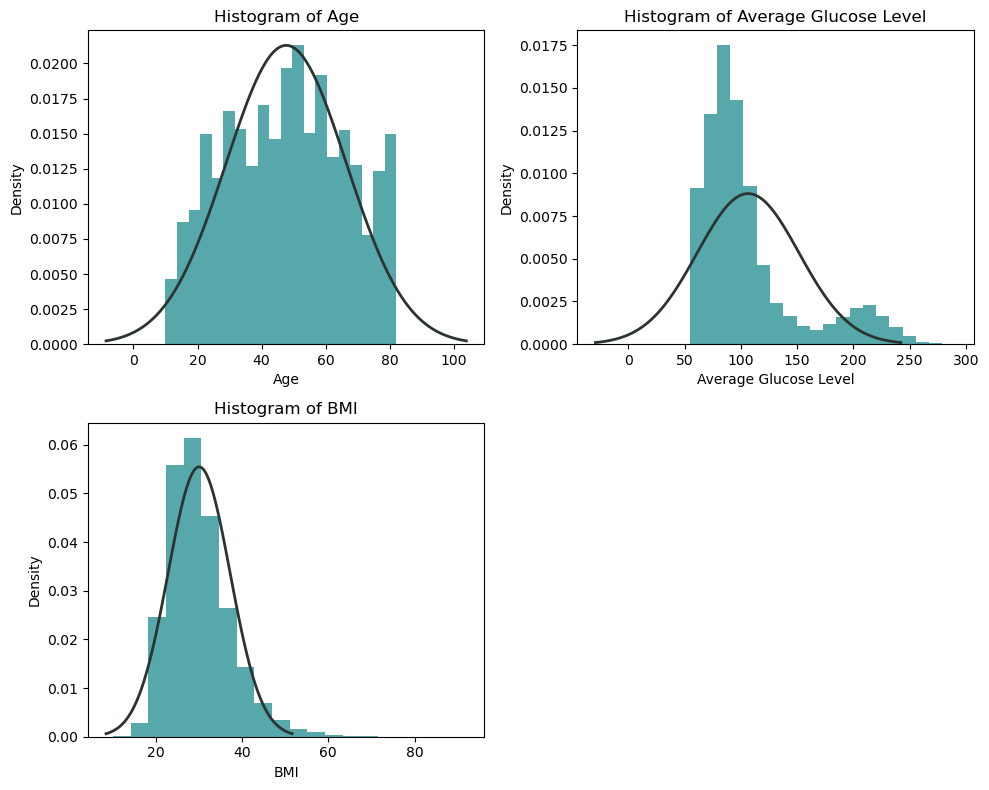

In [10]:
#Draw histograms with normal lines for continuous variables
from scipy.stats import norm

plt.figure(figsize=(10, 8))

# Histogram for 'age'
plt.subplot(2, 2, 1)
plt.hist(df['age'], bins=20, density=True, color='#0E8388', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Age')

mu_age, std_age = df['age'].mean(), df['age'].std()
x_age = np.linspace(mu_age - 3*std_age, mu_age + 3*std_age, 100)
plt.plot(x_age, norm.pdf(x_age, mu_age, std_age), color='#2C3333', linewidth=2)

# Histogram for 'avg_glucose_level'
plt.subplot(2, 2, 2)
plt.hist(df['avg_glucose_level'], bins=20, density=True, color='#0E8388', alpha=0.7)
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.title('Histogram of Average Glucose Level')

mu_glucose, std_glucose = df['avg_glucose_level'].mean(), df['avg_glucose_level'].std()
x_glucose = np.linspace(mu_glucose - 3*std_glucose, mu_glucose + 3*std_glucose, 100)
plt.plot(x_glucose, norm.pdf(x_glucose, mu_glucose, std_glucose), color='#2C3333', linewidth=2)

# Histogram for 'bmi'
plt.subplot(2, 2, 3)
plt.hist(df['bmi'], bins=20, density=True, color='#0E8388', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Histogram of BMI')

mu_bmi, std_bmi = df['bmi'].mean(), df['bmi'].std()
x_bmi = np.linspace(mu_bmi - 3*std_bmi, mu_bmi + 3*std_bmi, 100)
plt.plot(x_bmi, norm.pdf(x_bmi, mu_bmi, std_bmi), color='#2C3333', linewidth=2)

plt.tight_layout()

plt.show()

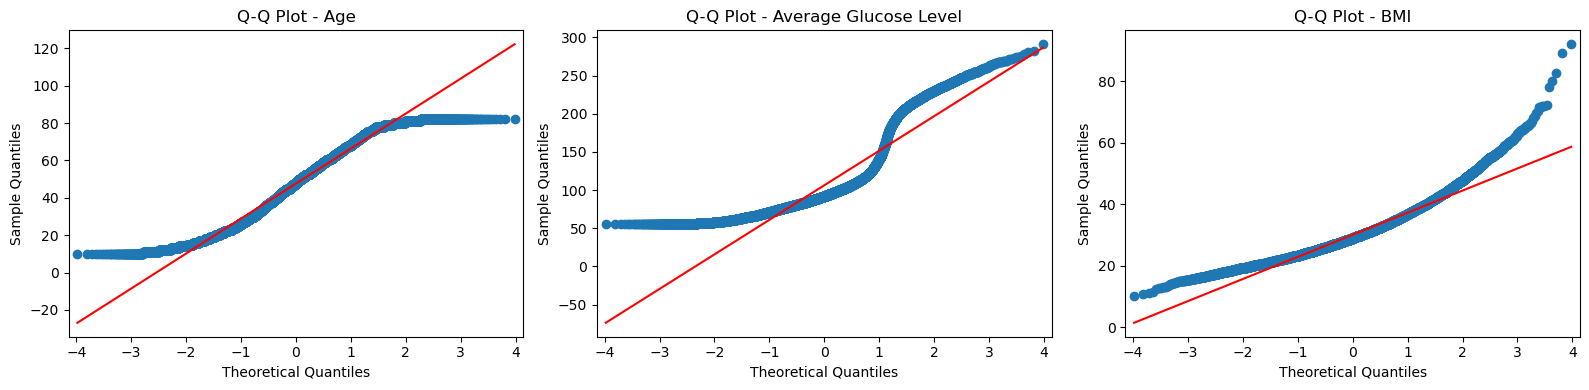

In [11]:
import statsmodels.api as sm
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for i, var in enumerate([(df['age'], 'Age'), (df['avg_glucose_level'], 'Average Glucose Level'), (df['bmi'], 'BMI')]):
    data, label = var
    qqplot = sm.qqplot(data, line='s', ax=axs[i])
    line = axs[i].lines[0]
    axs[i].set_title(f'Q-Q Plot - {label}')
    axs[i].set_xlabel('Theoretical Quantiles')
    axs[i].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

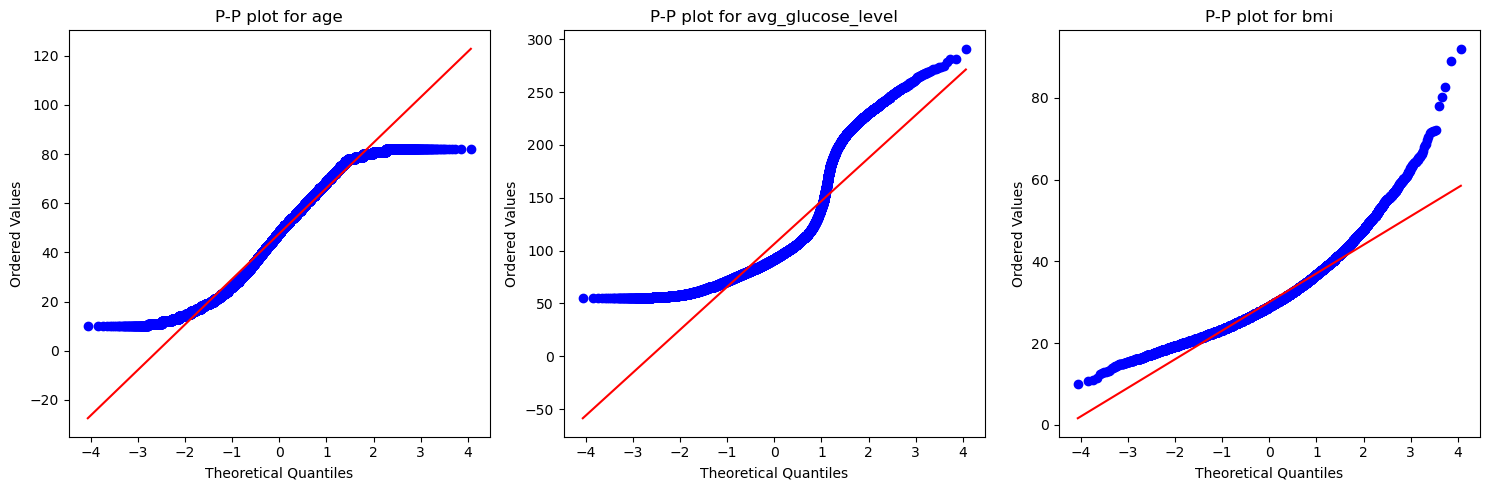

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(['age', 'avg_glucose_level', 'bmi']):
    data = df[column].values
    
    stats.probplot(data, dist="norm", plot=axs[i])
    axs[i].set_title(f'P-P plot for {column}')
    axs[i].set_xlabel('Theoretical Quantiles')
    axs[i].set_ylabel('Ordered Values')

plt.tight_layout()

plt.show()

In [13]:
#Kolmogorov-Smirnov test for normality
age_data = df['age']
glucose_data = df['avg_glucose_level']
bmi_data = df['bmi']

ks_age = stats.kstest(age_data, 'norm')
ks_glucose = stats.kstest(glucose_data, 'norm')
ks_bmi = stats.kstest(bmi_data, 'norm')

print("Kolmogorov-Smirnov test results:")
print("Age column: ")
print("   Statistic:", ks_age.statistic)
print("   p-value:", ks_age.pvalue)
print("   Statistic Location:", ks_age.statistic_location)
print("   Statistic Sign:", ks_age.statistic_sign)

print("Average Glucose Level column: ")
print("   Statistic:", ks_glucose.statistic)
print("   p-value:", ks_glucose.pvalue)
print("   Statistic Location:", ks_glucose.statistic_location)
print("   Statistic Sign:", ks_glucose.statistic_sign)

print("BMI column: ")
print("   Statistic:", ks_bmi.statistic)
print("   p-value:", ks_bmi.pvalue)
print("   Statistic Location:", ks_bmi.statistic_location)
print("   Statistic Sign:", ks_bmi.statistic_sign)

Kolmogorov-Smirnov test results:
Age column: 
   Statistic: 1.0
   p-value: 0.0
   Statistic Location: 10.0
   Statistic Sign: -1
Average Glucose Level column: 
   Statistic: 1.0
   p-value: 0.0
   Statistic Location: 55.01
   Statistic Sign: -1
BMI column: 
   Statistic: 1.0
   p-value: 0.0
   Statistic Location: 10.1
   Statistic Sign: -1


In [14]:
import statistics

columns = ['age', 'avg_glucose_level', 'bmi']

statistics_df = pd.DataFrame({
    'Statistic': ['Count', 'Mean', 'Median', 'Mode', 'Range', 'Minimum', 'Maximum', 'Standard Deviation', 'Variance']
})

for column in columns:
    values = df[column].dropna()
    count = values.count()
    mean = values.mean()
    median = values.median()
    mode = statistics.multimode(values)
    data_range = values.max() - values.min()
    minimum = values.min()
    maximum = values.max()
    std = values.std()
    var = values.var()
    
    statistics_df[column] = [count, mean, median, mode, data_range, minimum, maximum, std, var]

print(statistics_df)

            Statistic         age avg_glucose_level           bmi
0               Count       28916             28916         28916
1                Mean   47.668281        106.388265     30.049658
2              Median        48.0             92.12          28.9
3                Mode      [51.0]           [87.15]  [26.8, 27.6]
4               Range        72.0            236.04          81.9
5             Minimum        10.0             55.01          10.1
6             Maximum        82.0            291.05          92.0
7  Standard Deviation   18.732721         45.266083      7.190541
8            Variance  350.914824       2049.018249     51.703887


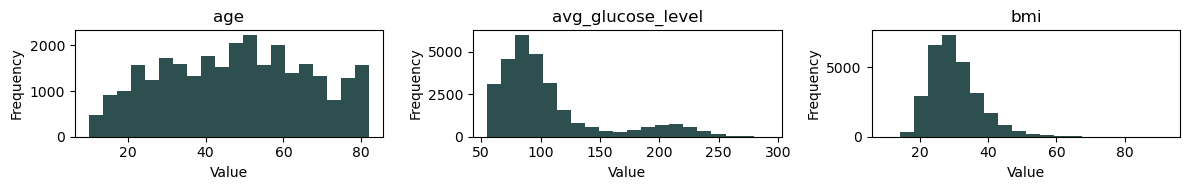

In [15]:
columns = ['age', 'avg_glucose_level', 'bmi']

bin_color = '#2E4F4F'

fig, axs = plt.subplots(1, len(columns), figsize=(12, 2))

for i, column in enumerate(columns):
    values = df[column].dropna()
    axs[i].hist(values, bins=20, color=bin_color)
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [16]:
#Power and Effect Size
from scipy.stats import mannwhitneyu
import statsmodels.stats.power as smp

#age
age_stroke_0 = df[df['stroke'] == 0]['age']
age_stroke_1 = df[df['stroke'] == 1]['age']
statistic, p_value = mannwhitneyu(age_stroke_0, age_stroke_1, alternative='two-sided')
n1, n2 = len(age_stroke_0), len(age_stroke_1)
u1 = n1 * n2 + (n1 * (n1 + 1)) / 2 - age_stroke_0.rank().sum()
effect_size = abs(statistic / (n1 * n2))

power = smp.tt_ind_solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05)

print("Age:")
print("Effect size:", effect_size)
print("Power:", power)

#avg_glucose_level
glucose_stroke_0 = df[df['stroke'] == 0]['avg_glucose_level']
glucose_stroke_1 = df[df['stroke'] == 1]['avg_glucose_level']
statistic, p_value = mannwhitneyu(glucose_stroke_0, glucose_stroke_1, alternative='two-sided')
n1, n2 = len(glucose_stroke_0), len(glucose_stroke_1)
u1 = n1 * n2 + (n1 * (n1 + 1)) / 2 - glucose_stroke_0.rank().sum()
effect_size = abs(statistic / (n1 * n2))

power = smp.tt_ind_solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05)

print("\nAverage Glucose Level:")
print("Effect size:", effect_size)
print("Power:", power)

#bmi
bmi_stroke_0 = df[df['stroke'] == 0]['bmi']
bmi_stroke_1 = df[df['stroke'] == 1]['bmi']
statistic, p_value = mannwhitneyu(bmi_stroke_0, bmi_stroke_1, alternative='two-sided')
n1, n2 = len(bmi_stroke_0), len(bmi_stroke_1)
u1 = n1 * n2 + (n1 * (n1 + 1)) / 2 - bmi_stroke_0.rank().sum()
effect_size = abs(statistic / (n1 * n2))

power = smp.tt_ind_solve_power(effect_size=effect_size, nobs1=n1, alpha=0.05)

print("\nBMI:")
print("Effect size:", effect_size)
print("Power:", power)

Age:
Effect size: 0.17841242497426993
Power: 1.0

Average Glucose Level:
Effect size: 0.39959474393445016
Power: 1.0

BMI:
Effect size: 0.4986453336330313
Power: 1.0


In [17]:
#Mann-Whitney U test
age_stroke = df[df['stroke'] == 1]['age']
age_no_stroke = df[df['stroke'] == 0]['age']
glucose_stroke = df[df['stroke'] == 1]['avg_glucose_level']
glucose_no_stroke = df[df['stroke'] == 0]['avg_glucose_level']
bmi_stroke = df[df['stroke'] == 1]['bmi']
bmi_no_stroke = df[df['stroke'] == 0]['bmi']

u_age, p_age = mannwhitneyu(age_stroke, age_no_stroke)
u_glucose, p_glucose = mannwhitneyu(glucose_stroke, glucose_no_stroke)
u_bmi, p_bmi = mannwhitneyu(bmi_stroke, bmi_no_stroke)

print('Age: U = %0.2f, p = %0.2f' % (u_age, p_age))
print('Avg Glucose Level: U = %0.2f, p = %0.2f' % (u_glucose, p_glucose))
print('BMI: U = %0.2f, p = %0.2f' % (u_bmi, p_bmi))

Age: U = 12749267.00, p = 0.00
Avg Glucose Level: U = 9316994.50, p = 0.00
BMI: U = 7779943.00, p = 0.91


In [18]:
#Point-biserial correlation calculation
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df['stroke'], df['age'])
print("Age:")
print("corr: ", corr)
print("p-value: ", p_value)

corr, p_value = pointbiserialr(df['stroke'], df['avg_glucose_level'])
print("\nAverage Glucose Level:")
print("corr: ", corr)
print("p-value: ", p_value)

corr, p_value = pointbiserialr(df['stroke'], df['bmi'])
print("\nBMI:")
print("corr: ", corr)
print("p-value: ", p_value)

Age:
corr:  0.1542641108763014
p-value:  1.8264299079538907e-153

Average Glucose Level:
corr:  0.07525378841310637
p-value:  1.363562245428136e-37

BMI:
corr:  -0.004175207957119057
p-value:  0.4777325333296788


In [19]:
#Spearman correlation calculation
from scipy.stats import spearmanr

#'age' & 'avg_glucose_level'
spearman_corr, p_value = spearmanr(df['age'], df['avg_glucose_level'])

print("'age' & 'avg_glucose_level")
print("Spearman correlation coefficient: ", spearman_corr)
print("p-value: ", p_value)

#'age' & 'bmi'
spearman_corr, p_value = spearmanr(df['age'], df['bmi'])

print("\n'age' & 'bmi")
print("Spearman correlation coefficient: ", spearman_corr)
print("p-value: ", p_value)

#'avg_glucose_level' & 'bmi'
spearman_corr, p_value = spearmanr(df['avg_glucose_level'], df['bmi'])

print("\n'avg_glucose_level' & 'bmi")
print("Spearman correlation coefficient: ", spearman_corr)
print("p-value: ", p_value)

'age' & 'avg_glucose_level
Spearman correlation coefficient:  0.15069011083731276
p-value:  1.8955773358193243e-146

'age' & 'bmi
Spearman correlation coefficient:  0.14288286710318548
p-value:  1.0195581844012552e-131

'avg_glucose_level' & 'bmi
Spearman correlation coefficient:  0.11507083585706132
p-value:  8.264772747080916e-86


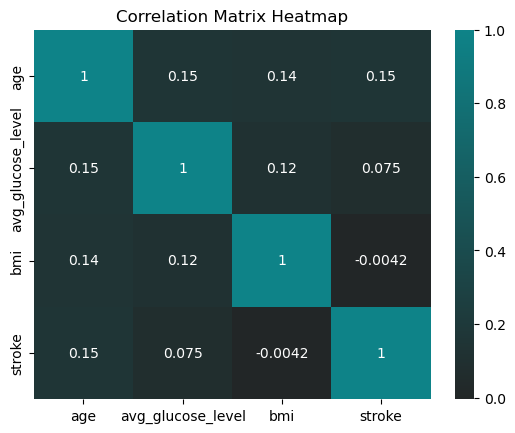

In [20]:
#Correlation heatmap
df_corr = pd.DataFrame([[1, 0.150690111, 0.142882867, 0.154264111],
                        [0.150690111, 1, 0.115070836, 0.075253788],
                        [0.142882867, 0.115070836, 1, -0.004175208],
                        [0.154264111, 0.075253788, -0.004175208, 1]],
                       index=['age', 'avg_glucose_level', 'bmi', 'stroke'],
                       columns=['age', 'avg_glucose_level', 'bmi', 'stroke'])

cmap = sns.dark_palette("#0E8388", as_cmap=True)
sns.heatmap(df_corr, annot=True, cmap=cmap)

plt.title("Correlation Matrix Heatmap")

plt.show()

In [21]:
df1 =  df.query('stroke == 1')

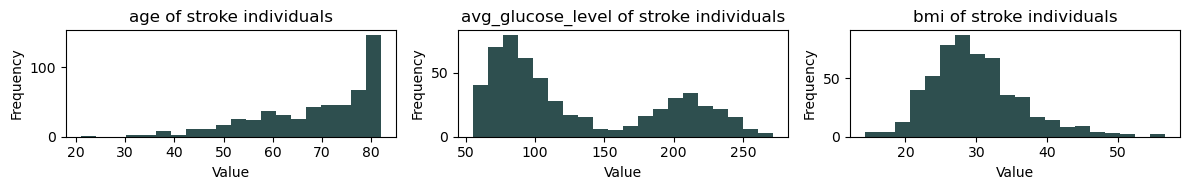

In [22]:
columns = ['age', 'avg_glucose_level', 'bmi']

bin_color = '#2E4F4F'

fig, axs = plt.subplots(1, len(columns), figsize=(12, 2))

for i, column in enumerate(columns):
    values = df1[column].dropna()
    axs[i].hist(values, bins=20, color=bin_color)
    axs[i].set_title(column + ' of stroke individuals')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

In [23]:
#z-score Calculation
z_score_age = (df1['age'] - np.mean(df1['age'])) / np.std(df1['age'])
df1['age_z_score'] = z_score_age

z_score_glucose = (df1['avg_glucose_level'] - np.mean(df1['avg_glucose_level'])) / np.std(df1['avg_glucose_level'])
df1['glucose_z_score'] = z_score_glucose

df1

C:\Users\Admin\AppData\Local\Temp\ipykernel_23188\2711246134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_z_score'] = z_score_age
C:\Users\Admin\AppData\Local\Temp\ipykernel_23188\2711246134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['glucose_z_score'] = z_score_glucose


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_z_score,glucose_z_score
40,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,-0.124937,1.602725
97,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0,0.973244,-0.409813
174,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0,-1.645495,0.660797
178,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0,0.888768,0.708172
197,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0,1.057719,0.906361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28863,Male,79.0,0.0,1.0,Yes,Self-employed,Urban,88.29,36.0,never smoked,1.0,0.888768,-0.698817
28891,Male,76.0,0.0,0.0,Yes,Self-employed,Rural,93.38,26.7,formerly smoked,1.0,0.635342,-0.615378
28910,Female,56.0,0.0,0.0,Yes,Private,Rural,83.27,32.9,smokes,1.0,-1.054167,-0.781109
29004,Female,80.0,0.0,0.0,Yes,Self-employed,Urban,75.91,26.7,never smoked,1.0,0.973244,-0.901759


In [24]:
def calculate_z_score(df, column, value):
    mean = df[column].mean()
    standard_deviation = df[column].std()
    z_score = (value - mean) / standard_deviation
    return z_score

if __name__ == "__main__":

    z_score_age_45 = calculate_z_score(df1, "age", 45)
    z_score_avg_glucose_level_88_29 = calculate_z_score(df1, "avg_glucose_level", 88.29)

    print("The z-score for the age of 45 is:", z_score_age_45)
    print("The z-score for the avg_glucose_level of 88.29 is:", z_score_avg_glucose_level_88_29)

    # Age
    pct_greater_than_45 = sum(z_score_age > z_score_age_45) / len(df1['age']) * 100

    print(f"{pct_greater_than_45:.2f}% of data points have an age greater than 45.")

    # Avg_glucose_level
    pct_smaller_than_88_29 = sum(z_score_glucose < z_score_avg_glucose_level_88_29) / len(df1['avg_glucose_level']) * 100

    print(f"{pct_smaller_than_88_29:.2f}% of data points have an average glucose level smaller than 88.29.")


The z-score for the age of 45 is: -1.9815831121459675
The z-score for the avg_glucose_level of 88.29 is: -0.6981781291938679
94.88% of data points have an age greater than 45.
35.65% of data points have an average glucose level smaller than 88.29.


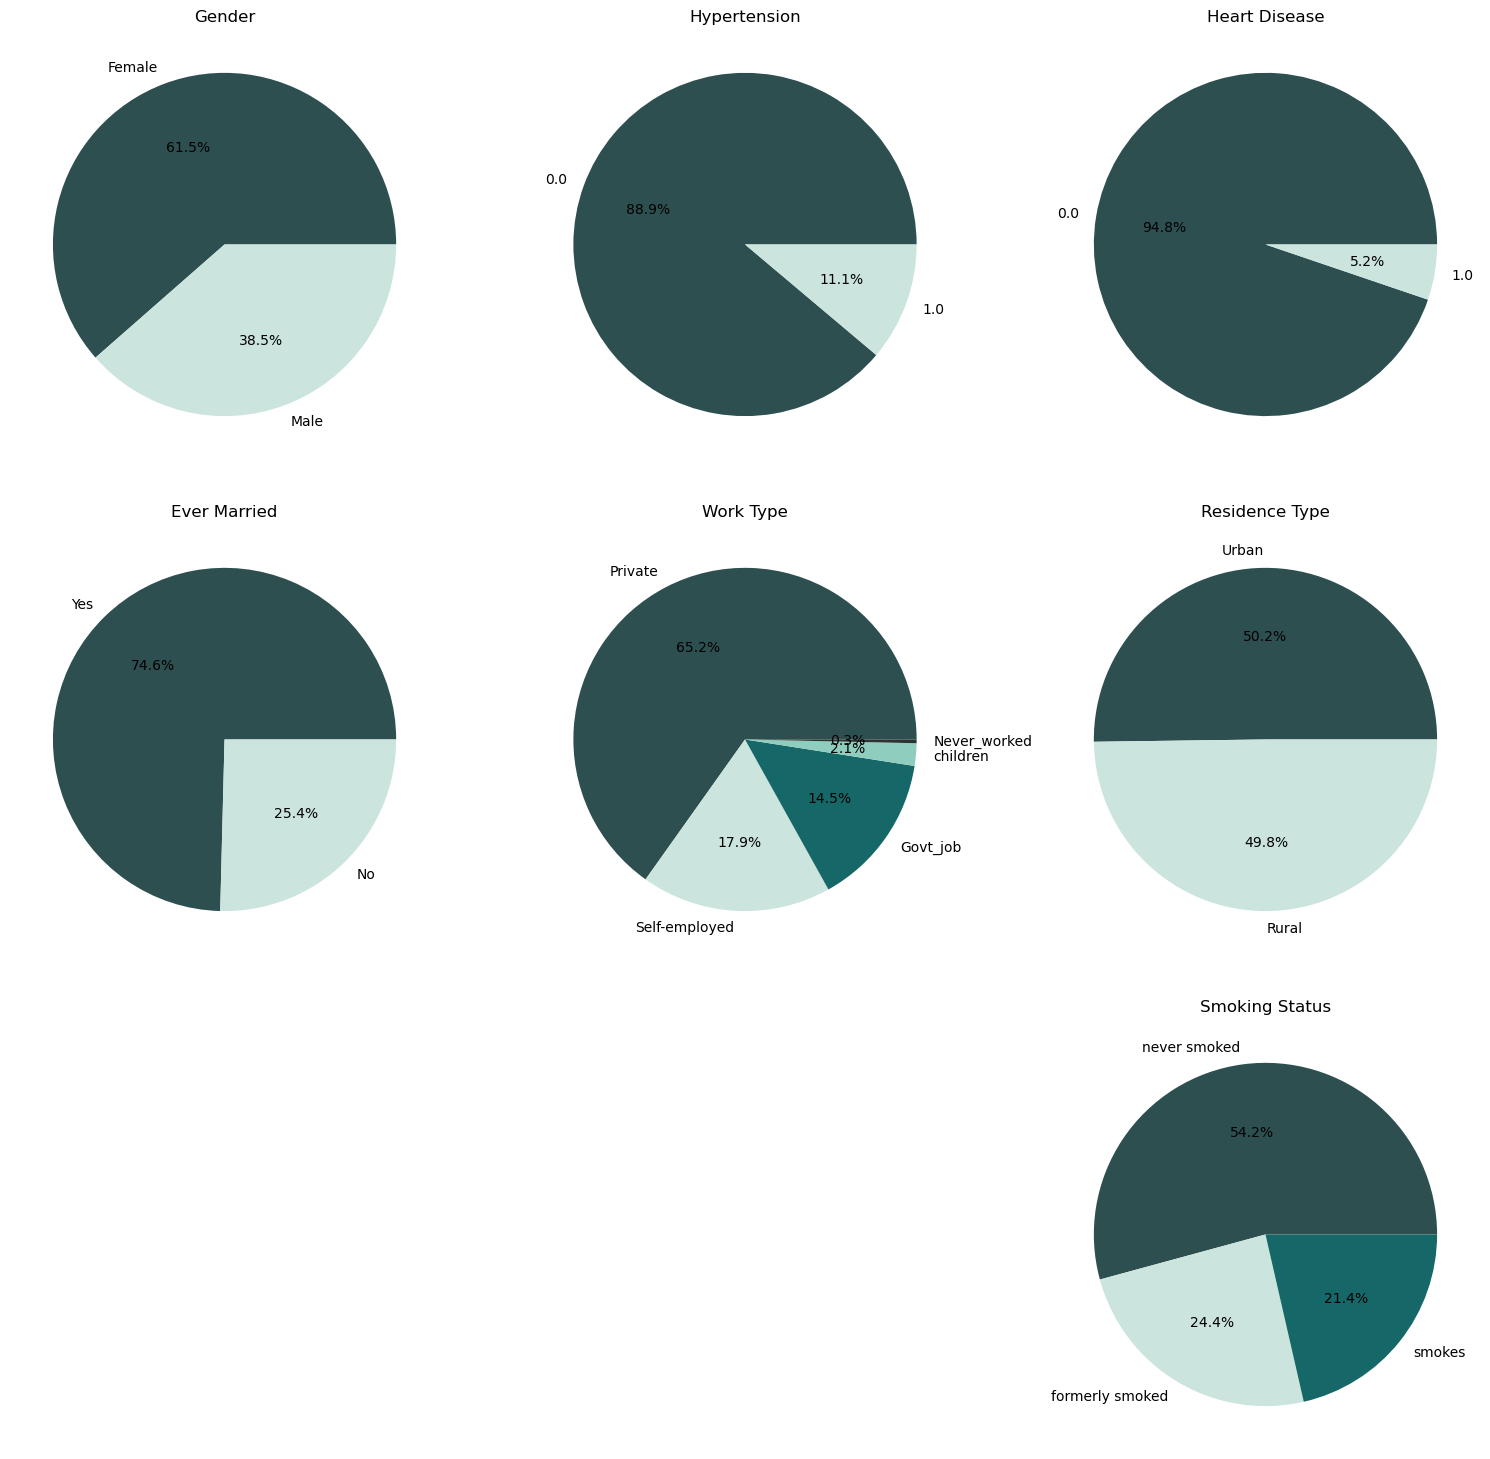

In [25]:
gender_data = df['gender'].value_counts()
hypertension_data = df['hypertension'].value_counts()
heart_disease_data = df['heart_disease'].value_counts()
ever_married_data = df['ever_married'].value_counts()
work_type_data = df['work_type'].value_counts()
residence_type_data = df['residence_type'].value_counts()
smoking_status_data = df['smoking_status'].value_counts()

labels = ['Gender', 'Hypertension', 'Heart Disease', 'Ever Married', 'Work Type', 'Residence Type', 'Smoking Status']

colors = ['#2E4F4F', '#CBE4DE', '#166767', '#8FCDBE', '#2C3333', ]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        if (i * 3 + j) < len(labels):
            col_name = labels[i * 3 + j].lower().replace(' ', '_')
            data = eval(col_name + '_data')
            axs[i, j].pie(data, labels=data.index, autopct='%1.1f%%', startangle=0, colors=colors)
            axs[i, j].set_title(labels[i * 3 + j])

fig.delaxes(axs[2, 0])
fig.delaxes(axs[2, 1])

axs[2, 2].pie(smoking_status_data, labels=smoking_status_data.index, autopct='%1.1f%%', startangle=0, colors=colors)
axs[2, 2].set_title(labels[6])

plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import chi2_contingency

gender_stroke_table = pd.crosstab(df['gender'], df['stroke'])
hypertension_stroke_table = pd.crosstab(df['hypertension'], df['stroke'])
heart_disease_stroke_table = pd.crosstab(df['heart_disease'], df['stroke'])
ever_married_stroke_table = pd.crosstab(df['ever_married'], df['stroke'])
work_type_stroke_table = pd.crosstab(df['work_type'], df['stroke'])
residence_type_stroke_table = pd.crosstab(df['residence_type'], df['stroke'])
smoking_status_stroke_table = pd.crosstab(df['smoking_status'], df['stroke'])

gender_chi2, gender_p_value, gender_dof, _ = stats.chi2_contingency(gender_stroke_table)
hypertension_chi2, hypertension_p_value, hypertension_dof, _ = stats.chi2_contingency(hypertension_stroke_table)
heart_disease_chi2, heart_disease_p_value, heart_disease_dof, _ = stats.chi2_contingency(heart_disease_stroke_table)
ever_married_chi2, ever_married_p_value, ever_married_dof, _ = stats.chi2_contingency(ever_married_stroke_table)
work_type_chi2, work_type_p_value, work_type_dof, _ = stats.chi2_contingency(work_type_stroke_table)
residence_type_chi2, residence_type_p_value, residence_type_dof, _ = stats.chi2_contingency(residence_type_stroke_table)
smoking_status_chi2, smoking_status_p_value, smoking_status_dof, _ = stats.chi2_contingency(smoking_status_stroke_table)

print("Chi-square test results:")
print("Variable\t\tChi-square\t\tDegrees of Freedom\tP-value")
print("--------------------------------------------------------------")
print(f"Gender\t\t\t{gender_chi2:.4f}\t\t\t{gender_dof}\t\t\t{gender_p_value:.4f}")
print(f"Hypertension\t\t{hypertension_chi2:.4f}\t\t{hypertension_dof}\t\t\t{hypertension_p_value:.4f}")
print(f"Heart Disease\t\t{heart_disease_chi2:.4f}\t\t{heart_disease_dof}\t\t\t{heart_disease_p_value:.4f}")
print(f"Ever Married\t\t{ever_married_chi2:.4f}\t\t\t{ever_married_dof}\t\t\t{ever_married_p_value:.4f}")
print(f"Work Type\t\t{work_type_chi2:.4f}\t\t\t{work_type_dof}\t\t\t{work_type_p_value:.4f}")
print(f"Residence Type\t\t{residence_type_chi2:.4f}\t\t\t{residence_type_dof}\t\t\t{residence_type_p_value:.4f}")
print(f"Smoking Status\t\t{smoking_status_chi2:.4f}\t\t\t{smoking_status_dof}\t\t\t{smoking_status_p_value:.4f}")

Chi-square test results:
Variable		Chi-square		Degrees of Freedom	P-value
--------------------------------------------------------------
Gender			4.4080			1			0.0358
Hypertension		179.0933		1			0.0000
Heart Disease		319.2124		1			0.0000
Ever Married		65.2294			1			0.0000
Work Type		75.8109			4			0.0000
Residence Type		0.0596			1			0.8072
Smoking Status		21.9462			2			0.0000


In [27]:
#gender*stroke Cross Tabulation
gender_stroke_table = pd.crosstab(df['gender'], df['stroke'])
gender_stroke_table_percent = gender_stroke_table.apply(lambda x: x / x.sum() * 100, axis=1)

total_counts = gender_stroke_table.sum()
total_percentage = total_counts / total_counts.sum() * 100

gender_stroke_table_percent.loc['Total'] = total_percentage
gender_stroke_table_percent = gender_stroke_table_percent.round(3)

gender_stroke_table_percent

stroke,0.0,1.0
gender,,
Female,98.244,1.756
Male,97.891,2.109
Total,98.108,1.892


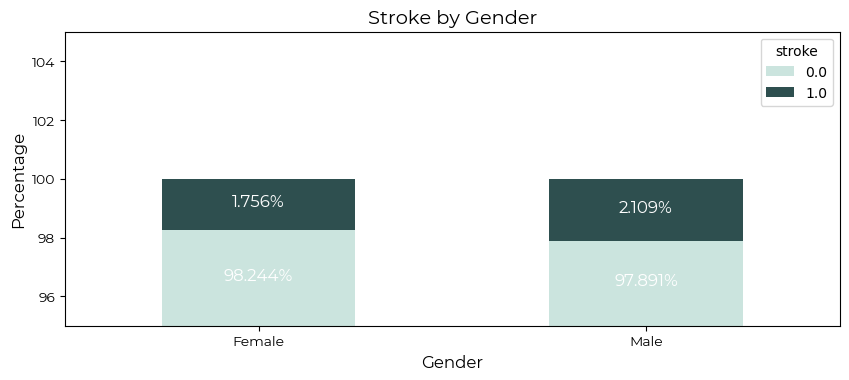

In [28]:
from matplotlib.font_manager import FontProperties

plot_data = gender_stroke_table_percent.drop('Total')

ax = plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#CBE4DE', '#2E4F4F'])

plt.xlabel('Gender', fontname='Montserrat', fontsize=12)
plt.ylabel('Percentage', fontname='Montserrat', fontsize=12)
plt.title('Stroke by Gender', fontname='Montserrat', fontsize=14)

ax.set_ylim(bottom=95)

plt.xticks(rotation=0)

plt.subplots_adjust(top=0.6)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontname = 'Montserrat', fontsize=12, color='white', fmt='%.3f%%', padding=2)
    
font_prop = FontProperties(family='Montserrat', size=10)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.show()

In [29]:
#hypertension*stroke Cross Tabulation
hypertension_stroke_table = pd.crosstab(df['hypertension'], df['stroke'])
hypertension_stroke_table_percent = hypertension_stroke_table.apply(lambda x: x / x.sum() * 100, axis=1)

total_counts = hypertension_stroke_table.sum()
total_percentage = total_counts / total_counts.sum() * 100

hypertension_stroke_table_percent.loc['Total'] = total_percentage.round(3)
hypertension_stroke_table_percent = hypertension_stroke_table_percent.round(3)

hypertension_stroke_table_percent

stroke,0.0,1.0
hypertension,,
0.0,98.490,1.510
1.0,95.065,4.935
Total,98.108,1.892


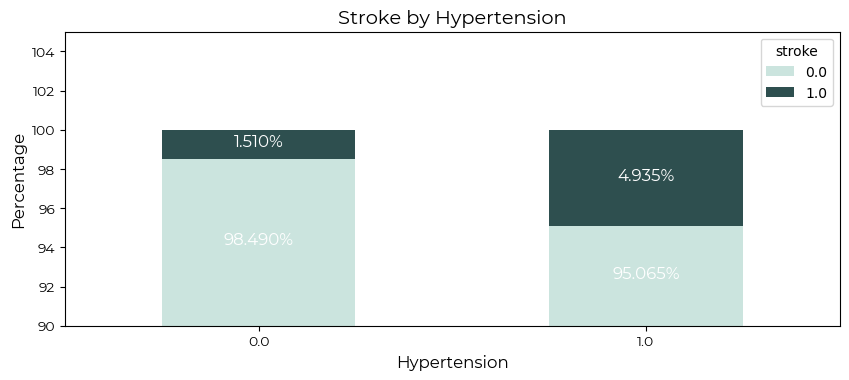

In [30]:
plot_data = hypertension_stroke_table_percent.drop('Total')

ax = plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#CBE4DE', '#2E4F4F'])

plt.xlabel('Hypertension', fontname='Montserrat', fontsize=12)
plt.ylabel('Percentage', fontname='Montserrat', fontsize=12)
plt.title('Stroke by Hypertension', fontname='Montserrat', fontsize=14)

ax.set_ylim(bottom=90)

plt.xticks(rotation=0)

plt.subplots_adjust(top=0.6)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontname = 'Montserrat', fontsize=12, color='white', fmt='%.3f%%', padding=2)
    
font_prop = FontProperties(family='Montserrat', size=10)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.show()

In [31]:
#heart_disease*stroke Cross Tabulation
heart_disease_stroke_table = pd.crosstab(df['heart_disease'], df['stroke'])
heart_disease_stroke_table_percent = heart_disease_stroke_table.apply(lambda x: x / x.sum() * 100, axis=1)

total_counts = heart_disease_stroke_table.sum()
total_percentage = total_counts / total_counts.sum() * 100

heart_disease_stroke_table_percent.loc['Total'] = total_percentage.round(3)
heart_disease_stroke_table_percent = heart_disease_stroke_table_percent.round(3)

heart_disease_stroke_table_percent

stroke,0.0,1.0
heart_disease,,
0.0,98.446,1.554
1.0,91.971,8.029
Total,98.108,1.892


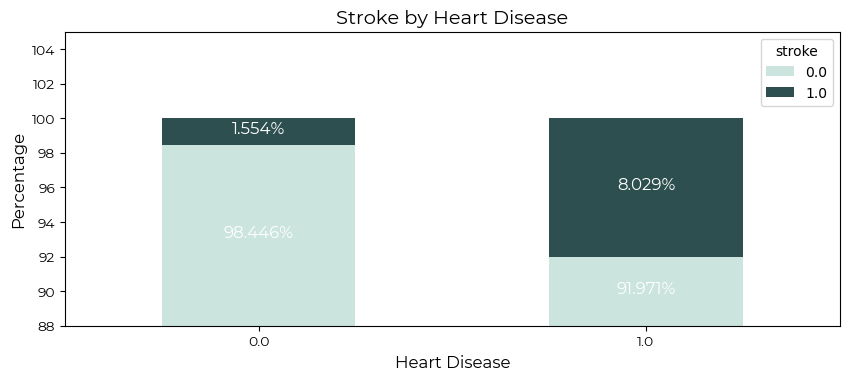

In [32]:
plot_data = heart_disease_stroke_table_percent.drop('Total')

ax = plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#CBE4DE', '#2E4F4F'])

plt.xlabel('Heart Disease', fontname='Montserrat', fontsize=12)
plt.ylabel('Percentage', fontname='Montserrat', fontsize=12)
plt.title('Stroke by Heart Disease', fontname='Montserrat', fontsize=14)

ax.set_ylim(bottom=88)

plt.xticks(rotation=0)

plt.subplots_adjust(top=0.6)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontname = 'Montserrat', fontsize=12, color='white', fmt='%.3f%%', padding=2)
    
font_prop = FontProperties(family='Montserrat', size=10)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.show()

In [33]:
#ever_married*stroke Cross Tabulation
ever_married_stroke_table = pd.crosstab(df['ever_married'], df['stroke'])
ever_married_stroke_table_percent = ever_married_stroke_table.apply(lambda x: x / x.sum() * 100, axis=1)

total_counts = ever_married_stroke_table.sum()
total_percentage = total_counts / total_counts.sum() * 100

ever_married_stroke_table_percent.loc['Total'] = total_percentage.round(3)
ever_married_stroke_table_percent = ever_married_stroke_table_percent.round(3)

ever_married_stroke_table_percent

stroke,0.0,1.0
ever_married,,
No,99.224,0.776
Yes,97.728,2.272
Total,98.108,1.892


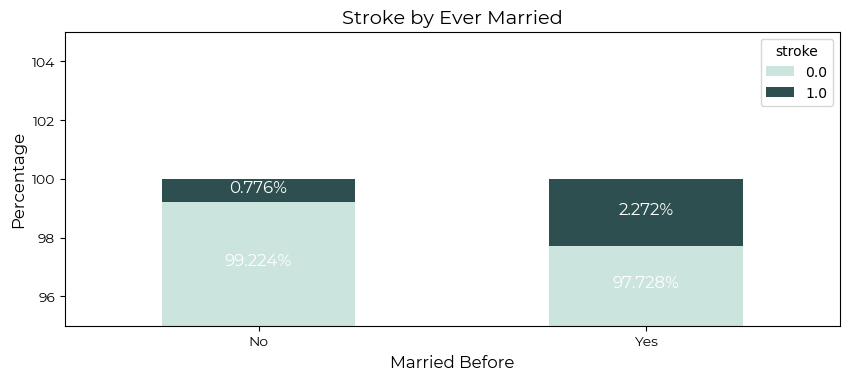

In [34]:
plot_data = ever_married_stroke_table_percent.drop('Total')

ax = plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#CBE4DE', '#2E4F4F'])

plt.xlabel('Married Before', fontname='Montserrat', fontsize=12)
plt.ylabel('Percentage', fontname='Montserrat', fontsize=12)
plt.title('Stroke by Ever Married', fontname='Montserrat', fontsize=14)

ax.set_ylim(bottom=95)

plt.xticks(rotation=0)

plt.subplots_adjust(top=0.6)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontname = 'Montserrat', fontsize=12, color='white', fmt='%.3f%%', padding=2)
    
font_prop = FontProperties(family='Montserrat', size=10)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.show()

In [35]:
#work_type*stroke Cross Tabulation
work_type_stroke_table = pd.crosstab(df['work_type'], df['stroke'])
work_type_stroke_table_percent = work_type_stroke_table.apply(lambda x: x / x.sum() * 100, axis=1)

total_counts = work_type_stroke_table.sum()
total_percentage = total_counts / total_counts.sum() * 100

work_type_stroke_table_percent.loc['Total'] = total_percentage.round(3)
work_type_stroke_table_percent = work_type_stroke_table_percent.round(3)

work_type_stroke_table_percent

stroke,0.0,1.0
work_type,,
Govt_job,98.421,1.579
Never_worked,100.000,0.000
Private,98.350,1.650
Self-employed,96.718,3.282
children,100.000,0.000
Total,98.108,1.892


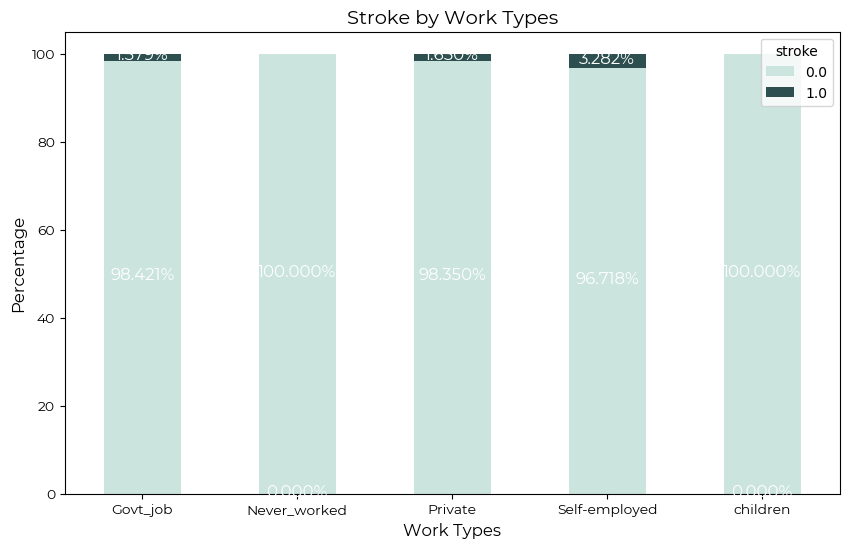

In [36]:
plot_data = work_type_stroke_table_percent.drop('Total')

ax = plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#CBE4DE', '#2E4F4F'])

plt.xlabel('Work Types', fontname='Montserrat', fontsize=12)
plt.ylabel('Percentage', fontname='Montserrat', fontsize=12)
plt.title('Stroke by Work Types', fontname='Montserrat', fontsize=14)

plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontname='Montserrat', fontsize=12, color='white', fmt='%.3f%%', padding=2)

font_prop = FontProperties(family='Montserrat', size=10)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.show()

In [37]:
#smoking_status*stroke Cross Tabulation
smoking_status_stroke_table = pd.crosstab(df['smoking_status'], df['stroke'])
smoking_status_stroke_table_percent = smoking_status_stroke_table.apply(lambda x: x / x.sum() * 100, axis=1)

total_counts = smoking_status_stroke_table.sum()
total_percentage = total_counts / total_counts.sum() * 100

smoking_status_stroke_table_percent.loc['Total'] = total_percentage.round(3)
smoking_status_stroke_table_percent = smoking_status_stroke_table_percent.round(3)

smoking_status_stroke_table_percent

stroke,0.0,1.0
smoking_status,,
formerly smoked,97.458,2.542
never smoked,98.367,1.633
smokes,98.192,1.808
Total,98.108,1.892


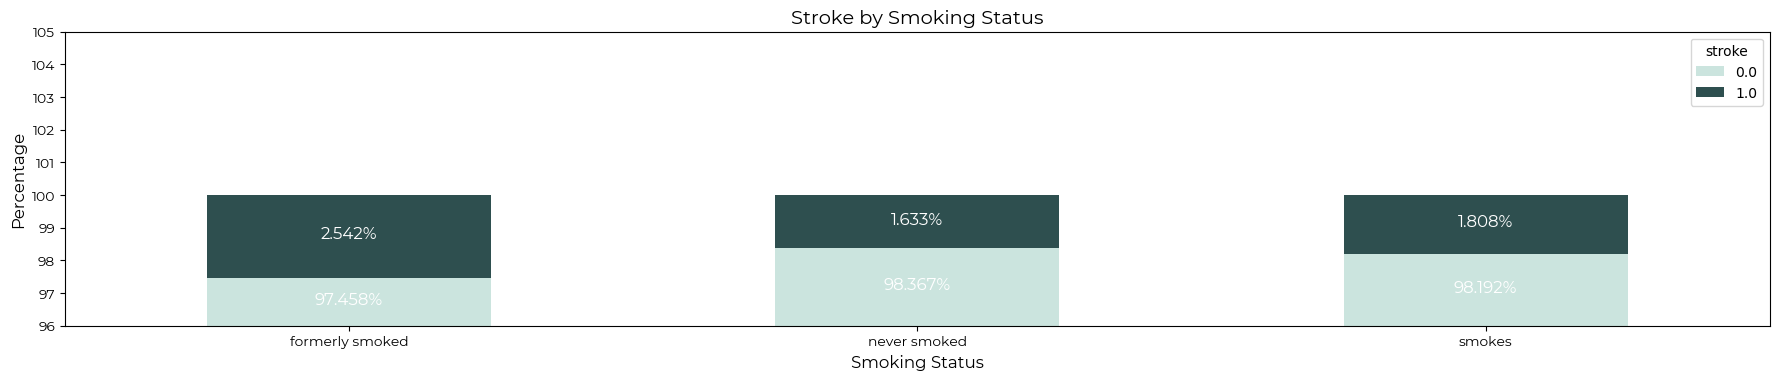

In [38]:
plot_data = smoking_status_stroke_table_percent.drop('Total')

ax = plot_data.plot(kind='bar', stacked=True, figsize=(22, 6), color=['#CBE4DE', '#2E4F4F'])

plt.xlabel('Smoking Status', fontname='Montserrat', fontsize=12)
plt.ylabel('Percentage', fontname='Montserrat', fontsize=12)
plt.title('Stroke by Smoking Status', fontname='Montserrat', fontsize=14)

ax.set_ylim(bottom=96)

plt.xticks(rotation=0)

plt.subplots_adjust(top=0.6)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontname = 'Montserrat', fontsize=12, color='white', fmt='%.3f%%', padding=2)
    
font_prop = FontProperties(family='Montserrat', size=10)
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.show()

In [39]:
married_work_stroke_table = pd.crosstab([df['ever_married'], df['work_type']], df['stroke'])
married_work_stroke_table = married_work_stroke_table.apply(lambda x: x / x.sum() * 100, axis=1)

total_counts = married_work_stroke_table.sum()
total_percentage = total_counts / total_counts.sum() * 100

married_work_stroke_table.loc['Total'] = total_percentage.round(3)
married_work_stroke_table = married_work_stroke_table.round(3)

chi2, p_value, _, _ = chi2_contingency(married_work_stroke_table.iloc[:-1, :-1])

print(married_work_stroke_table)
print(p_value)

stroke                    0.0    1.0
(No, Govt_job)         99.224  0.776
(No, Never_worked)    100.000  0.000
(No, Private)          99.402  0.598
(No, Self-employed)    97.059  2.941
(No, children)        100.000  0.000
(Yes, Govt_job)        98.238  1.762
(Yes, Never_worked)   100.000  0.000
(Yes, Private)         97.950  2.050
(Yes, Self-employed)   96.667  3.333
Total                  98.727  1.273
1.0


In [40]:
def get_glucose_category(avg_glucose_level):
    if avg_glucose_level < 70:
        return 'Low'
    elif avg_glucose_level < 100:
        return 'Normal'
    elif avg_glucose_level < 150:
        return 'High'
    else:
        return 'Very High'
df['glucose_category'] = df['avg_glucose_level'].apply(get_glucose_category)

def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25.0:
        return 'Normal'
    elif bmi < 30.0:
        return 'Overweight'
    elif bmi < 35.0:
        return 'Obese'
    else:
        return 'Super Obese'
df['bmi_category'] = df['bmi'].apply(get_bmi_category)

df["health_issue_count"] = (df["hypertension"] == 1).astype(int) + \
                                  (df["heart_disease"] == 1).astype(int) + \
                                  (df["glucose_category"].isin(["Low", "High", "Very High"])).astype(int) + \
                                  (df["bmi_category"].isin(["Obese", "Super Obese"])).astype(int)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucose_category,bmi_category,health_issue_count
0,Male,58.0,1.0,0.0,Yes,Private,Urban,87.96,39.2,never smoked,0.0,Normal,Super Obese,2
1,Female,70.0,0.0,0.0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0,Low,Super Obese,2
2,Female,52.0,0.0,0.0,Yes,Private,Urban,77.59,17.7,formerly smoked,0.0,Normal,Underweight,0
3,Female,75.0,0.0,1.0,Yes,Self-employed,Rural,243.53,27.0,never smoked,0.0,Very High,Overweight,2
4,Female,32.0,0.0,0.0,Yes,Private,Rural,77.67,32.3,smokes,0.0,Normal,Obese,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,Female,10.0,0.0,0.0,No,children,Urban,58.64,20.4,never smoked,0.0,Low,Normal,1
29061,Female,56.0,0.0,0.0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0.0,Very High,Super Obese,2
29062,Female,82.0,1.0,0.0,Yes,Private,Urban,91.94,28.9,formerly smoked,0.0,Normal,Overweight,1
29063,Male,40.0,0.0,0.0,Yes,Private,Urban,99.16,33.2,never smoked,0.0,Normal,Obese,1


In [41]:
#health_issue_count*stroke Cross Tabulation
health_issue_count_stroke_table = pd.crosstab(df['health_issue_count'], df['stroke'])
health_issue_count_stroke_table = health_issue_count_stroke_table.apply(lambda x: x / x.sum() * 100, axis=1)

total_counts = health_issue_count_stroke_table.sum()
total_percentage = total_counts / total_counts.sum() * 100

health_issue_count_stroke_table.loc['Total'] = total_percentage.round(3)
health_issue_count_stroke_table = health_issue_count_stroke_table.round(3)

health_issue_count_stroke_table

stroke,0.0,1.0
health_issue_count,,
0,98.871,1.129
1,98.637,1.363
2,97.271,2.729
3,95.261,4.739
4,89.796,10.204
Total,95.967,4.033


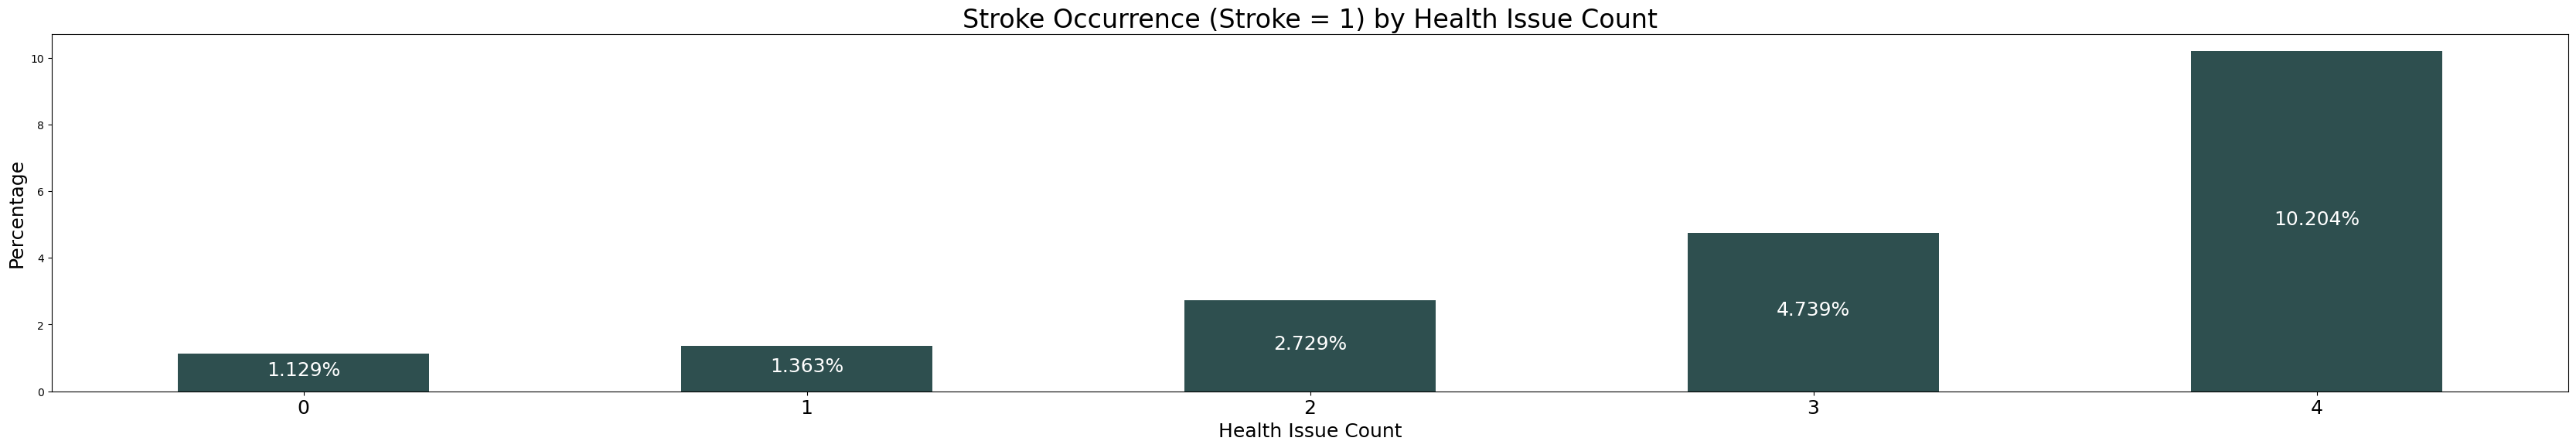

In [42]:
import matplotlib.pyplot as plt

health_issue_count_stroke_table_filtered = health_issue_count_stroke_table.drop('Total')[1]

ax = health_issue_count_stroke_table_filtered.plot(kind='bar', figsize=(42, 6), color='#2E4F4F')

plt.xlabel('Health Issue Count', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Stroke Occurrence (Stroke = 1) by Health Issue Count', fontsize=24)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=18, color='white', fmt='%.3f%%', padding=2)

plt.xticks(rotation=0, fontsize = 18)

plt.show()

In [43]:
chi2, p_value, dof, expected = stats.chi2_contingency(health_issue_count_stroke_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom (df):", dof)
print("p-value:", p_value)

Chi-square statistic: 14.428780990059204
Degrees of freedom (df): 5
p-value: 0.013103342274608626


In [44]:
#(smoking_status * health_issue_count) * stroke Cross Tabulation
health_smoking_stroke_table = pd.crosstab([df['smoking_status'], df['health_issue_count']], df['stroke'])

health_smoking_stroke_table = health_smoking_stroke_table.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)

chi2, p, dof, expected = chi2_contingency(health_smoking_stroke_table)

print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

health_smoking_stroke_table

Chi-square statistic: 44.53253222858696
p-value: 4.8566060379867334e-05
Degrees of freedom: 14
Expected frequencies: [[95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]
 [95.85266667  4.14733333]]


stroke                                0.0    1.0
smoking_status  health_issue_count              
formerly smoked 0                   98.32   1.68
                1                   98.06   1.94
                2                   96.93   3.07
                3                   94.67   5.33
                4                   89.66  10.34
never smoked    0                   99.09   0.91
                1                   98.78   1.22
                2                   97.42   2.58
                3                   95.89   4.11
                4                   90.91   9.09
smokes          0                   98.81   1.19
                1                   98.87   1.13
                2                   97.36   2.64
                3                   94.78   5.22
                4                   88.24  11.76

In [45]:
#(work_type * health_issue_count) * stroke Cross Tabulation
health_work_stroke_table = pd.crosstab([df['work_type'], df['health_issue_count']], df['stroke'])

health_work_stroke_table = health_work_stroke_table.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)

chi2, p, dof, expected = chi2_contingency(health_work_stroke_table)

print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

health_work_stroke_table

Chi-square statistic: 102.73258742189476
p-value: 9.453664471442912e-13
Degrees of freedom: 21
Expected frequencies: [[97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]
 [97.28681818  2.71318182]]


stroke                               0.0    1.0
work_type     health_issue_count               
Govt_job      0                    99.37   0.63
              1                    98.90   1.10
              2                    97.59   2.41
              3                    95.87   4.13
              4                    88.24  11.76
Never_worked  0                   100.00   0.00
              1                   100.00   0.00
              2                   100.00   0.00
              3                   100.00   0.00
Private       0                    99.03   0.97
              1                    98.90   1.10
              2                    97.47   2.53
              3                    95.59   4.41
              4                    86.81  13.19
Self-employed 0                    97.42   2.58
              1                    97.16   2.84
              2                    96.30   3.70
              3                    94.22   5.78
              4                    97.44   2.56
children      0                   100.00   0.00
              1                   100.00   0.00
              2                   100.00   0.00

In [46]:
data = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type',
           'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

data = pd.get_dummies(data, drop_first=True)

X = data.drop('stroke', axis=1)
y = data['stroke']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()

         Current function value: 0.078717
         Iterations: 35


c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                28916
Model:                          Logit   Df Residuals:                    28901
Method:                           MLE   Df Model:                           14
Date:                Fri, 23 Jun 2023   Pseudo R-squ.:                  0.1607
Time:                        23:38:33   Log-Likelihood:                -2276.2
converged:                      False   LL-Null:                       -2712.1
Covariance Type:            nonrobust   LLR p-value:                4.539e-177
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -8.5709      0.396    -21.657      0.000      -9.347      -7.795
age                             0.0725      0.004     18.971      0.000       0.065       0.080
hypertension                    0.4445      0.101      4.417      0.000       0.247       0.642
heart_disease                   0.6150      0.114      5.417      0.000       0.393       0.838
avg_glucose_level               0.0038      0.001      4.909      0.000       0.002       0.005
bmi                            -0.0084      0.007     -1.180      0.238      -0.022       0.006
gender_Male                     0.0248      0.092      0.271      0.787      -0.155       0.205
ever_married_Yes               -0.1578      0.146     -1.079      0.280      -0.444       0.129
work_type_Never_worked         -5.3873     38.432     -0.140      0.889     -80.712      69.938
work_type_Private               0.0574      0.139      0.412      0.680      -0.216       0.330
work_type_Self-employed        -0.0360      0.152     -0.237      0.813      -0.334       0.262
work_type_children            -19.8231   3.38e+04     -0.001      1.000   -6.62e+04    6.61e+04
residence_type_Urban            0.0191      0.088      0.216      0.829      -0.154       0.192
smoking_status_never smoked     0.0254      0.103      0.248      0.804      -0.176       0.227
smoking_status_smokes           0.2680      0.127      2.110      0.035       0.019       0.517
===============================================================================================
"""

In [47]:
def cox_snell_r_square(model, X, y):
    y_pred = model.predict(X)

    ll_null = np.sum(y * np.log(np.mean(y)) + (1 - y) * np.log(1 - np.mean(y)))

    ll_model = np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    cox_snell_r_square = 1 - np.exp((2 / len(y)) * (ll_null - ll_model))

    return cox_snell_r_square

data = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type',
           'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

data = pd.get_dummies(data, drop_first=True)

X = data.drop('stroke', axis=1)
y = data['stroke']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

cox_snell_r_square = cox_snell_r_square(result, X, y)

print("Cox & Snell R-square:", cox_snell_r_square)

         Current function value: 0.078717
         Iterations: 35
Cox & Snell R-square: 0.02970242612058882


c:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
#Reliability test
import pandas as pd
from scipy import stats

corr_matrix = df.corr()

num_items = len(df.columns)

cronbach_alpha = (num_items / (num_items - 1)) * (1 - (sum(corr_matrix.sum()) - num_items) / sum(corr_matrix.sum()))

degrees_freedom = num_items - 1

critical_value = stats.chi2.ppf(0.95, degrees_freedom)

if cronbach_alpha > critical_value:
    print("Reliability test passed. Cronbach's alpha:", cronbach_alpha)
else:
    print("Reliability test failed. Cronbach's alpha:", cronbach_alpha)

Reliability test failed. Cronbach's alpha: 0.9877888225914057


C:\Users\Admin\AppData\Local\Temp\ipykernel_23188\3085267328.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
